In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("Single_data.csv")

In [3]:
data.head()

,AnalogValue,Density,Amplitude,Result
0,587,579,0.72,0
1,589,592,0.72,0
2,605,603,0.74,0
3,624,627,0.76,0
4,622,622,0.76,0


In [29]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
y.head()


0    0
1    0
2    0
3    0
4    0
Name: Result, dtype: int64

In [33]:
y.shape

(400,)

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [31]:
X.shape

(400, 3)

In [35]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder()
y = y.values
# Fit and transform the target variable
y = encoder.fit_transform(y.reshape(-1, 1)).toarray()


In [36]:
print("the shape of X:", X.shape)
print("the shape of y:", y.shape)

the shape of X: (400, 3)
the shape of y: (400, 4)


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [38]:
print(X_train.shape)
print(y_train.shape)

(320, 3)
(320, 4)


In [42]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [44]:
# Create the model
from keras.models import Sequential
from keras.layers import Conv1D, LSTM, Flatten, Dense

# Create the model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=64))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 1, 32)             128       
                                                                 
 lstm (LSTM)                 (None, 1, 64)             24832     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 4)                

In [84]:
model.fit(X_train, y_train, epochs =100 )

Epoch 1/100
10/10 [==============================] - 0s 6ms/step - loss: 0.3938 - accuracy: 0.7875
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.3796 - accuracy: 0.8000
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3842 - accuracy: 0.7937
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3724 - accuracy: 0.8062
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3693 - accuracy: 0.8125
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3643 - accuracy: 0.8094
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.3706 - accuracy: 0.8031
Epoch 8/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3656 - accuracy: 0.8062
Epoch 9/100
10/10 [==============================] - 0s 7ms/step - loss: 0.3619 - accuracy: 0.8156
Epoch 10/100
10/10 [==============================] - 0s 7ms/step - loss: 0.3763 - accuracy: 0.8062
Epoch 11/

10/10 [==============================] - 0s 7ms/step - loss: 0.3835 - accuracy: 0.7844
Epoch 84/100
10/10 [==============================] - 0s 6ms/step - loss: 0.3855 - accuracy: 0.8094
Epoch 85/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3461 - accuracy: 0.8250
Epoch 86/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3590 - accuracy: 0.8031
Epoch 87/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3524 - accuracy: 0.8188
Epoch 88/100
10/10 [==============================] - 0s 6ms/step - loss: 0.3565 - accuracy: 0.8156
Epoch 89/100
10/10 [==============================] - 0s 6ms/step - loss: 0.3672 - accuracy: 0.8000
Epoch 90/100
10/10 [==============================] - 0s 6ms/step - loss: 0.3576 - accuracy: 0.8062
Epoch 91/100
10/10 [==============================] - 0s 6ms/step - loss: 0.3568 - accuracy: 0.8000
Epoch 92/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3628 - accuracy: 0.8031
Epoch 93/100


In [52]:
y_pred = model.predict(X_test)

# If you have performed one-hot encoding on your y data, you can convert the predictions back to class labels
predicted_labels = np.argmax(y_pred, axis=1)

# Print the predicted labels
print(predicted_labels)

3/3 [==============================] - 0s 4ms/step
[0 1 2 0 0 0 1 0 2 0 3 2 2 0 2 1 3 3 0 2 0 3 3 3 0 2 0 3 0 0 3 2 0 3 3 0 0
 1 1 2 1 3 0 2 0 3 0 2 0 0 2 0 0 2 3 1 3 3 2 2 1 0 0 0 1 1 1 3 3 2 0 1 1 1
 0 1 0 0 1 0]


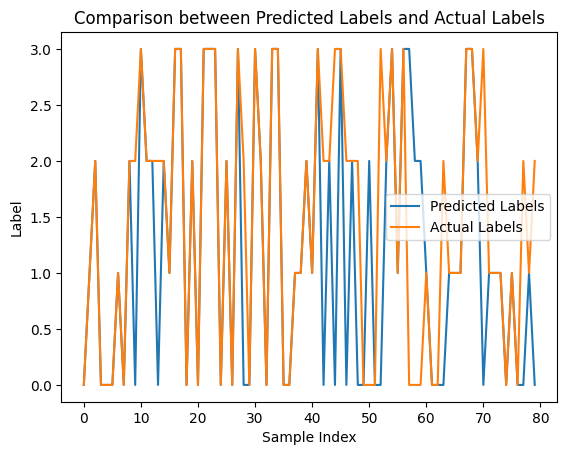

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the predicted labels (in one-hot encoded format) and y_test (in one-hot encoded format)

# Convert one-hot encoded labels to categorical labels
# predicted_labels = np.argmax(predicted_labels, axis=1)
actual_labels = np.argmax(y_test, axis=1)

# Create a line plot to compare predicted labels and actual labels
plt.plot(predicted_labels, label='Predicted Labels')
plt.plot(actual_labels, label='Actual Labels')
plt.xlabel('Sample Index')
plt.ylabel('Label')
plt.title('Comparison between Predicted Labels and Actual Labels')
plt.legend()
plt.show()


In [71]:
test_data = pd.read_csv("upper1.csv")

In [72]:
test_data = test_data.iloc[:,:-1]
test_data = test_data.drop("Unnamed: 0", axis = 1)

In [73]:
test_data.head()

,AnalogValue,Density,Amplitude
0,501,506,0.61
1,506,506,0.62
2,502,497,0.61
3,497,498,0.61
4,484,483,0.59


In [74]:
test_data = test_data.iloc[:1,:]
test_data.head()

,AnalogValue,Density,Amplitude
0,501,506,0.61


In [77]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
test_data = scaler.fit_transform(test_data)

In [81]:
# test_data = test_data.reshape(test_data, ())
test_data = np.reshape(test_data, (test_data.shape[0], test_data.shape[1], 1))
test_data.shape

(1, 3, 1)

In [83]:
pred = model.predict(test_data)
predicted_labels = np.argmax(pred, axis=1)

# Print the predicted labels
print(predicted_labels)


1/1 [==============================] - 0s 27ms/step
[2]
